In [1]:
!pip install pandas-datareader

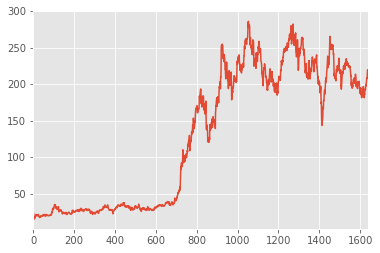

In [1]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
import pandas as pd
import pandas_datareader as web
style.use('ggplot')
start= dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)
df = web.DataReader('TSLA','yahoo', start, end)
df.to_csv('tsla.csv')
df= pd.read_csv('tsla.csv')
df['Adj Close'].plot()
plt.show()

In [2]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickets():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text,'lxml')
    table = soup.find('table',{'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    with open("sp500tickers.pickel","wb") as f:
        pickle.dump(tickers,f)
    print(tickers)
    return tickers

In [3]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web

def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
            ticker = row.findAll('td')[0].text
            tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
            pickle.dump(tickers, f)

    print(tickers)

    return tickers

save_sp500_tickers()

def get_data_from_google(reload_sp500=True):

    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

    if not os.path.exists('stock_dfs'):
         os.makedirs('stock_dfs')

    start = dt.datetime(2000,1,1)
    end = dt.datetime(2016,12,31)

    for ticker in tickers:
        try:
            print(ticker)
            if not os.path.exists('stocks_dfs/{}.csv'.format(ticker)):
                df = web.DataReader(ticker, 'google', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            else:
                print('Already have {}'.format(ticker))
        except:
            print('Cannot obtain data for ' +ticker)

get_data_from_google()

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BCR', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI', 

In [7]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)

            df.rename(columns = {'Close':ticker}, inplace=True)
            df.drop(['Open', 'High', 'Low', 'Volume'], 1, inplace=True)

            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df, how='outer')

        except:
            print('stock_dfs/{}.csv'.format(ticker) + ' not found')

    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')
compile_data()

stock_dfs/LMT.csv not found
stock_dfs/NWL.csv not found
stock_dfs/NBL.csv not found
               MMM    ABT   ABBV     ACN   ATVI     AYI    ADBE   AMD     AAP  \
Date                                                                            
2016-11-07  169.74  39.86  58.91  119.97  41.09  226.65  108.66  6.96  137.54   
2016-11-08  171.03  39.83  58.81  119.81  41.01  231.11  108.39  7.00  137.67   
2016-11-09  170.39  40.07  62.64  117.21  40.15  241.65  107.86  6.94  140.33   
2016-11-10  174.28  40.61  64.00  120.33  38.70  254.94  104.08  6.30  145.82   
2016-11-11  175.08  40.14  63.10  119.18  39.41  253.56  103.68  6.68  145.02   

              AES  ...     WYNN    XEL    XRX   XLNX     XL    XYL    YUM  \
Date               ...                                                      
2016-11-07  12.41  ...    87.86  41.15  37.24  51.26  35.30  48.56  62.01   
2016-11-08  12.43  ...    86.67  41.52  37.12  51.70  36.19  49.30  62.00   
2016-11-09  12.01  ...    87.84  39.58  